In [47]:
import time as tm
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from datetime import datetime, time as dt_time

print("SETUP OK.")
file = "household_power_consumption.csv"

SETUP OK.


In [48]:
def print_head(data, n=5):
    if isinstance(data, pd.DataFrame):
        display(data.head(n))
    elif isinstance(data, np.ndarray):
        display(pd.DataFrame(data[:n]))
    else:
        print("Непідтримуваний тип даних. Підтримуються лише DataFrame або NumPy масив.")

In [49]:
def create_numpy_arr(file_path):
    dtype = [('Date', 'U10'), ('Time', 'U8'), ('Global_active_power', float), 
             ('Global_reactive_power', float), ('Voltage', float), 
             ('Global_intensity', float), ('Sub_metering_1', float), 
             ('Sub_metering_2', float), ('Sub_metering_3', float)]
    
    data = np.genfromtxt(file_path, delimiter=',', skip_header=1, missing_values='?', filling_values=np.nan, dtype=dtype)
    
    return data

In [50]:
def create_data_frame(file_path):
    dtype = {
        'Global_active_power': float,
        'Global_reactive_power': float,
        'Voltage': float,
        'Global_intensity': float,
        'Sub_metering_1': float,
        'Sub_metering_2': float,
        'Sub_metering_3': float
    }

    na_values = ['?']
    df = pd.read_csv(file_path, dtype=dtype, na_values=na_values)
    
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time
    df = df.dropna()
    
    msno.matrix(df)
    plt.show()

    return df

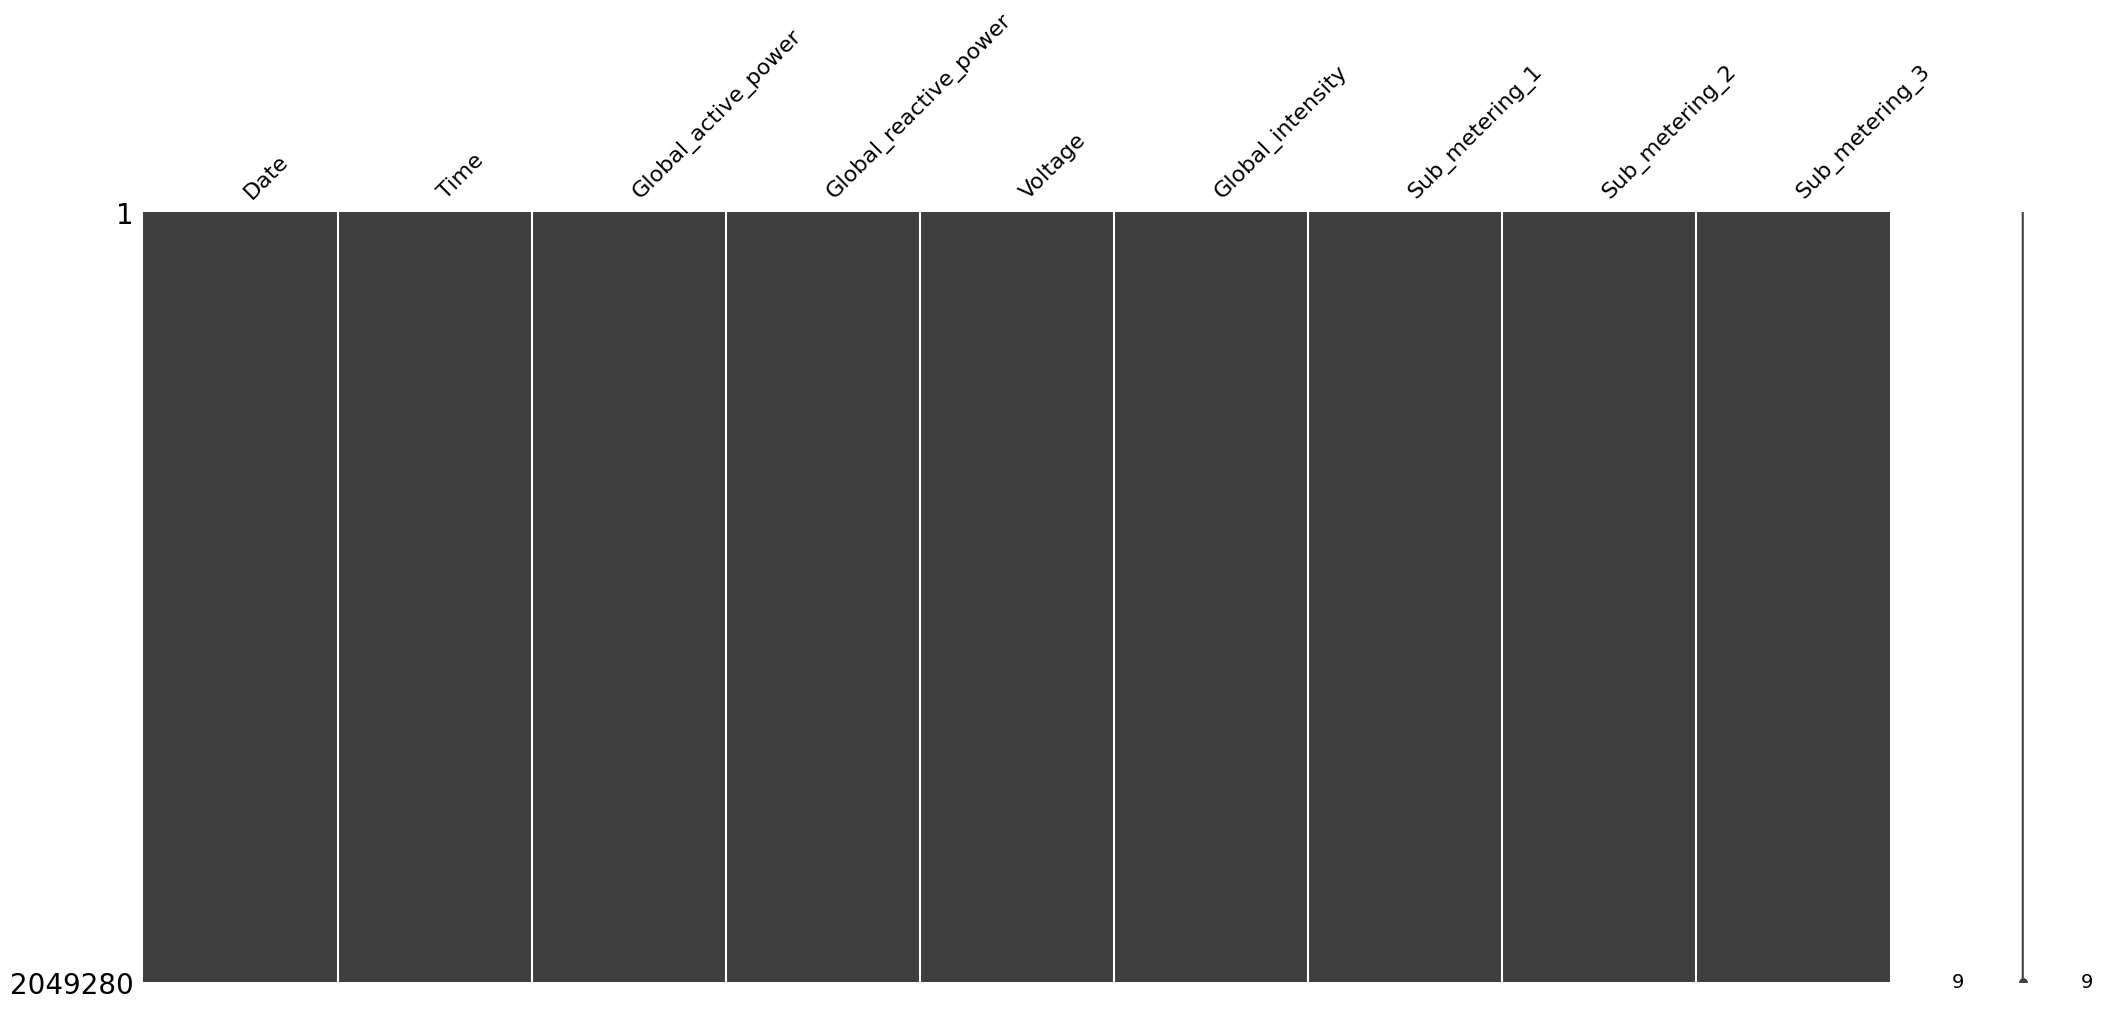

In [51]:
df = create_data_frame(file)
np_arr = create_numpy_arr(file)

In [52]:
print_head(np_arr, 10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.86,15.8,0.0,2.0,16.0


### Задача 1. Обрати всі домогосподарства, у яких загальна активна споживана потужність перевищує 5 кВт.

#### Функція для фільтрації DataFrame 

In [53]:
def filter_by_power(df, threshold=5.0):
    return df[df['Global_active_power'] > threshold]

#### Функція фільтрації NumPy масиву

In [54]:
def filter_by_power_np(np_arr, threshold=5.0):
    return np_arr[np_arr['Global_active_power'] > threshold]

#### Фільтрація DataFrame

In [55]:
start_time = tm.time()
filtered_df = filter_by_power(df)
print_head(filtered_df)
end_time = tm.time() - start_time
print(f"Час виконання для DataFrame: {end_time:.4f} секунд")

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
11,2006-12-16,17:35:00,5.412,0.470,232.78,23.2,0.0,1.0,17.0
12,2006-12-16,17:36:00,5.224,0.478,232.99,22.4,0.0,1.0,16.0


Час виконання для DataFrame: 0.0128 секунд


#### Фільтрація NumPy масиву

In [56]:
start_time_np = tm.time()
filtered_np = filter_by_power_np(np_arr)
print_head(filtered_np)
end_time_np = tm.time() - start_time_np
print(f"Час виконання для NumPy масиву: {end_time_np:.4f} секунд")

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
1,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
3,16/12/2006,17:35:00,5.412,0.470,232.78,23.2,0.0,1.0,17.0
4,16/12/2006,17:36:00,5.224,0.478,232.99,22.4,0.0,1.0,16.0


Час виконання для NumPy масиву: 0.0313 секунд


### Задача 2. Обрати всі домогосподарства, у яких вольтаж перевищую 235 В.

#### Функція для фільтрації DataFrame 

In [57]:
def filter_by_voltage(df, threshold=235):
    return df[df['Voltage'] > threshold]

#### Функція фільтрації NumPy масиву за вольтажем

In [58]:
def filter_by_voltage_np(np_arr, threshold=235):
    return np_arr[np_arr['Voltage'] > threshold]

#### Фільтрація DataFrame

In [59]:
start_time = tm.time()
filtered_df = filter_by_voltage(df)
print_head(filtered_df)
end_time = tm.time() - start_time
print(f"Час виконання для DataFrame: {end_time:.4f} секунд")




,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
5,2006-12-16,17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
6,2006-12-16,17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
7,2006-12-16,17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
14,2006-12-16,17:38:00,4.054,0.422,235.24,17.6,0.0,1.0,17.0


Час виконання для DataFrame: 0.1089 секунд


#### Фільтрація NumPy масиву

In [60]:
start_time_np = tm.time()
filtered_np = filter_by_voltage_np(np_arr)
print_head(filtered_np)
end_time_np = tm.time() - start_time_np
print(f"Час виконання для NumPy масиву: {end_time_np:.4f} секунд")

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
1,16/12/2006,17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
2,16/12/2006,17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
3,16/12/2006,17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
4,16/12/2006,17:38:00,4.054,0.422,235.24,17.6,0.0,1.0,17.0


Час виконання для NumPy масиву: 0.1348 секунд


### Задача 3. Обрати всі домогосподарства, у яких сила струму лежить в межах 19-20 А, для них виявити ті, у яких пральна машина та холодильних споживають більше, ніж бойлер та кондиціонер.

#### Функція для фільтрації DataFrame 

In [61]:
def filter_by_current_and_consumption(df, current_range=(19, 20)):
    filtered_df = df[(df['Global_intensity'] >= current_range[0]) & (df['Global_intensity'] <= current_range[1])]
    filtered_df = filtered_df[(filtered_df['Sub_metering_2'] > filtered_df['Sub_metering_3']) &
                              (filtered_df['Sub_metering_2'] > filtered_df['Sub_metering_1'])]
    return filtered_df

#### Функція фільтрації NumPy 

In [62]:
def filter_by_current_and_consumption_np(np_arr, current_range=(19, 20)):
    filtered_arr = np_arr[(np_arr['Global_intensity'] >= current_range[0]) & (np_arr['Global_intensity'] <= current_range[1])]
    filtered_arr = filtered_arr[(filtered_arr['Sub_metering_2'] > filtered_arr['Sub_metering_3']) &
                                (filtered_arr['Sub_metering_2'] > filtered_arr['Sub_metering_1'])]
    return filtered_arr

#### Фільтрація DataFrame

In [63]:
start_time = tm.time()
filtered_df = filter_by_current_and_consumption(df)
print_head(filtered_df)
end_time = tm.time() - start_time
print(f"Час виконання для DataFrame: {end_time:.4f} секунд")




,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
45,2006-12-16,18:09:00,4.464,0.136,234.66,19.0,0.0,37.0,16.0
460,2006-12-17,01:04:00,4.582,0.258,238.08,19.6,0.0,13.0,0.0
464,2006-12-17,01:08:00,4.618,0.104,239.61,19.6,0.0,27.0,0.0
475,2006-12-17,01:19:00,4.636,0.140,237.37,19.4,0.0,36.0,0.0
476,2006-12-17,01:20:00,4.634,0.152,237.17,19.4,0.0,35.0,0.0


Час виконання для DataFrame: 0.0474 секунд


#### Фільтрація NumPy масиву

In [64]:
start_time_np = tm.time()
filtered_np = filter_by_current_and_consumption_np(np_arr)
print_head(filtered_np)
end_time_np = tm.time() - start_time_np
print(f"Час виконання для NumPy масиву: {end_time_np:.4f} секунд")

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,18:09:00,4.464,0.136,234.66,19.0,0.0,37.0,16.0
1,17/12/2006,01:04:00,4.582,0.258,238.08,19.6,0.0,13.0,0.0
2,17/12/2006,01:08:00,4.618,0.104,239.61,19.6,0.0,27.0,0.0
3,17/12/2006,01:19:00,4.636,0.140,237.37,19.4,0.0,36.0,0.0
4,17/12/2006,01:20:00,4.634,0.152,237.17,19.4,0.0,35.0,0.0


Час виконання для NumPy масиву: 0.0626 секунд


### Задача 4. Обрати випадковим чином 500000 домогосподарств (без повторів елементів вибірки), для них обчислити середні величини усіх 3-х груп споживання електричної енергії, а також

#### Функція для фільтрації DataFrame 

In [65]:
def random_sample_average(df, n=500000):
    sampled_indices = np.random.choice(df.index, n, replace=True)
    sampled_df = df.loc[sampled_indices]
    averages = sampled_df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean()
    return averages

#### Функція для випадкової вибірки домогосподарств та обчислення середніх значень (NumPy масив)

In [66]:
def random_sample_average_np(np_arr, n=500000):
    sampled_indices = np.random.choice(np_arr.shape[0], n, replace=True)
    sampled_np = np_arr[sampled_indices]
    avg_sub_metering_1 = np.mean(sampled_np['Sub_metering_1'])
    avg_sub_metering_2 = np.mean(sampled_np['Sub_metering_2'])
    avg_sub_metering_3 = np.mean(sampled_np['Sub_metering_3'])
    
    averages = {
        'Sub_metering_1': avg_sub_metering_1,
        'Sub_metering_2': avg_sub_metering_2,
        'Sub_metering_3': avg_sub_metering_3
    }
    return averages

#### Випадкова вибірка та обчислення середніх значень (DataFrame)

In [67]:
start_time = tm.time()
averages_df = random_sample_average(df, n=500000)
print("\nСередні значення для DataFrame:")
print(averages_df)
end_time = tm.time() - start_time
print(f"Час виконання для DataFrame: {end_time:.4f} секунд")


Середні значення для DataFrame:
Sub_metering_1    1.115400
Sub_metering_2    1.299028
Sub_metering_3    6.455714
dtype: float64
Час виконання для DataFrame: 0.2565 секунд


#### Випадкова вибірка та обчислення середніх значень (NumPy масив)

In [68]:
start_time_np = tm.time()
averages_np = random_sample_average_np(np_arr, n=500000)
print("\nСередні значення для NumPy масиву:")
print(averages_np)
end_time_np = tm.time() - start_time_np
print(f"Час виконання для NumPy масиву: {end_time_np:.4f} секунд")



Середні значення для NumPy масиву:
{'Sub_metering_1': nan, 'Sub_metering_2': nan, 'Sub_metering_3': nan}
Час виконання для NumPy масиву: 0.1550 секунд


### Задача 5. Обрати ті домогосподарства, які після 18-00 споживають понад 6 кВт за хвилину в середньому, серед відібраних визначити ті, у яких основне споживання електроенергії у вказаний проміжок часу припадає на пральну машину, сушарку, холодильник та освітлення (група 2 є найбільшою), а потім обрати кожен третій результат із першої половини та кожен четвертий результат із другої половини.

#### Функція для фільтрації DataFrame 

In [69]:
def complex_filter(df):
    filtered_df = df[(df['Time'] > dt_time(18, 0)) & 
                     (df['Global_active_power'] > 6) & 
                     (df['Sub_metering_2'] > df['Sub_metering_1']) & 
                     (df['Sub_metering_2'] > df['Sub_metering_3'])]

    fh = filtered_df.iloc[:len(filtered_df) // 2]
    sh = filtered_df.iloc[len(filtered_df) // 2:]
    result = pd.concat([fh.iloc[2::3], sh.iloc[3::4]])

    return result



#### Функція складного фільтра для NumPy масиву

In [70]:
def complex_filter_np(np_arr):
    time_column = np.array([datetime.strptime(t, '%H:%M:%S').time() for t in np_arr['Time']])

    condition = (time_column > dt_time(18, 0, 0)) & \
                (np_arr['Global_active_power'] > 6) & \
                (np_arr['Sub_metering_2'] > np_arr['Sub_metering_1']) & \
                (np_arr['Sub_metering_2'] > np_arr['Sub_metering_3'])
    
    filtered_array = np_arr[condition]

    fh = filtered_array[:len(filtered_array) // 2]
    sh = filtered_array[len(filtered_array) // 2:]

    result = np.concatenate([fh[2::3], sh[3::4]])
    return result

#### Фільтрація DataFrame

In [71]:
start_time = tm.time()
filtered_df = complex_filter(df)
print_head(filtered_df)
end_time = tm.time() - start_time
print(f"Час виконання для DataFrame: {end_time:.4f} секунд")


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
43,2006-12-16,18:07:00,6.474,0.144,231.85,27.8,0.0,37.0,16.0
3007,2006-12-18,19:31:00,6.158,0.442,229.08,27.0,0.0,36.0,0.0
17497,2006-12-28,21:01:00,7.062,0.270,235.76,30.2,2.0,65.0,17.0
17500,2006-12-28,21:04:00,7.376,0.238,234.67,31.4,1.0,72.0,17.0
17503,2006-12-28,21:07:00,7.248,0.000,235.34,30.8,1.0,72.0,17.0


Час виконання для DataFrame: 0.1112 секунд


#### Фільтрація NumPy масиву

In [72]:
start_time_np = tm.time()
filtered_np = complex_filter_np(np_arr)
print_head(filtered_np)
end_time_np = tm.time() - start_time_np
print(f"Час виконання для NumPy масиву: {end_time_np:.4f} секунд")

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,18:07:00,6.474,0.144,231.85,27.8,0.0,37.0,16.0
1,18/12/2006,19:31:00,6.158,0.442,229.08,27.0,0.0,36.0,0.0
2,28/12/2006,21:01:00,7.062,0.270,235.76,30.2,2.0,65.0,17.0
3,28/12/2006,21:04:00,7.376,0.238,234.67,31.4,1.0,72.0,17.0
4,28/12/2006,21:07:00,7.248,0.000,235.34,30.8,1.0,72.0,17.0


Час виконання для NumPy масиву: 14.8497 секунд


### ВИСНОВОК.


Порівняння часу виконання різних операцій:


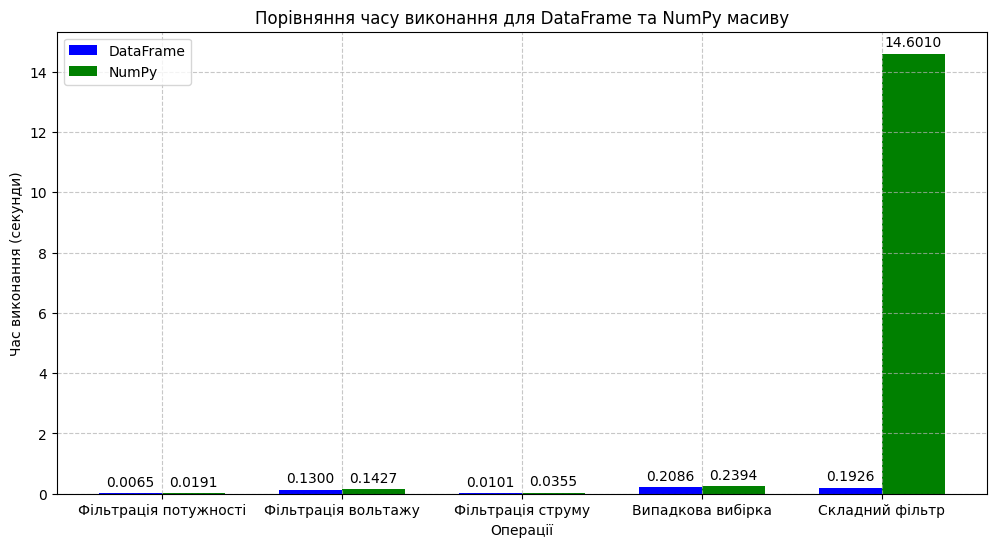

In [73]:
def execution_time_comparison(df_times, np_times, labels):
    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots(figsize=(12, 6))
    bars1 = ax.bar(x - width/2, df_times, width, label='DataFrame', color='blue')
    bars2 = ax.bar(x + width/2, np_times, width, label='NumPy', color='green')

    ax.set_xlabel('Операції')
    ax.set_ylabel('Час виконання (секунди)')
    ax.set_title('Порівняння часу виконання для DataFrame та NumPy масиву')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    for bar in bars1 + bars2:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Визначити часи виконання для кожної операції
# Задача 1
start_time = tm.time()
filtered_df_power = filter_by_power(df)
end_time_power = tm.time() - start_time

start_time_np = tm.time()
filtered_np_power = filter_by_power_np(np_arr)
end_time_power_np = tm.time() - start_time_np

# Задача 2
start_time = tm.time()
filtered_df_voltage = filter_by_voltage(df)
end_time_voltage = tm.time() - start_time

start_time_np = tm.time()
filtered_np_voltage = filter_by_voltage_np(np_arr)
end_time_voltage_np = tm.time() - start_time_np

# Задача 3
start_time = tm.time()
filtered_df_current = filter_by_current_and_consumption(df)
end_time_current = tm.time() - start_time

start_time_np = tm.time()
filtered_np_current = filter_by_current_and_consumption_np(np_arr)
end_time_current_np = tm.time() - start_time_np

# Задача 4
start_time = tm.time()
averages_df = random_sample_average(df, n=500000)
end_time_sample = tm.time() - start_time

start_time_np = tm.time()
averages_np = random_sample_average_np(np_arr, n=500000)
end_time_sample_np = tm.time() - start_time_np

# Задача 5
start_time = tm.time()
filtered_df_complex = complex_filter(df)
end_time_complex = tm.time() - start_time

start_time_np = tm.time()
filtered_np_complex = complex_filter_np(np_arr)
end_time_complex_np = tm.time() - start_time_np

# Зібрати часи виконання для всіх операцій
df_times = [end_time_power, end_time_voltage, end_time_current, end_time_sample, end_time_complex]
np_times = [end_time_power_np, end_time_voltage_np, end_time_current_np, end_time_sample_np, end_time_complex_np]
labels = ['Фільтрація потужності', 'Фільтрація вольтажу', 'Фільтрація струму', 'Випадкова вибірка', 'Складний фільтр']

# Підсумок результатів та візуалізація
print("\nПорівняння часу виконання різних операцій:")
execution_time_comparison(df_times, np_times, labels)